# 1. Exercises 4.1, 4.2, 4.3 

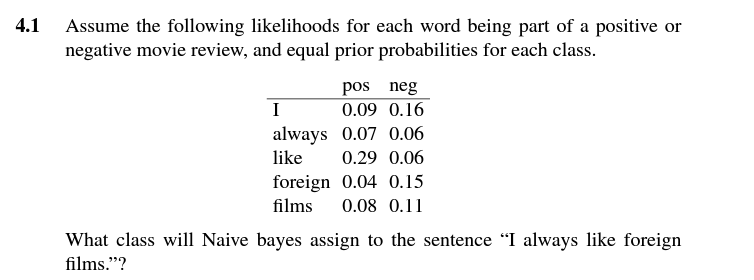

In [1]:
#Probabilities
P_ipos = .09
P_alwayspos = .07
P_likepos = .29
P_foreignpos = .04
P_filmspos = .08
P_ineg = .16
P_alwaysneg = .06
P_likeneg = .06
P_foreignneg = .15
P_filmsneg = .11

P_pos = P_ipos*P_alwayspos*P_likepos*P_foreignpos*P_filmspos
P_neg = P_ineg*P_alwaysneg*P_likeneg*P_foreignneg*P_filmsneg
print("Positive: " + str(P_pos))
print("Negative: " + str(P_neg))

Positive: 5.8464e-06
Negative: 9.503999999999999e-06


P_neg > P_pos

**Review is more likely to be negative**

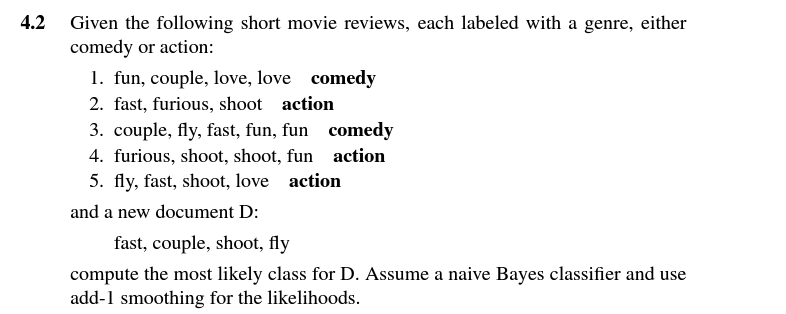

In [2]:
#vocab = {fun couple love fast furious shoot fly}
vocab = 7;
n = 5;
W_comedy = 9;
W_action = 11;

#P(word|genre) = {Count(words)+1}/{TotalWords(class)+v}
P_fast_comedy = (1+1)/(W_comedy+vocab)
P_couple_comedy = (2+1)/(W_comedy+vocab)
P_shoot_comedy = (0+1)/(W_comedy+vocab)
P_fly_comedy = (1+1)/(W_comedy+vocab)
P_fast_action = (2+1)/(W_action+vocab)
P_couple_action = (0+1)/(W_action+vocab)
P_shoot_action = (4+1)/(W_action+vocab)
P_fly_action = (1+1)/(W_action+vocab)

P_D_comedy = P_fast_comedy*P_couple_comedy*P_shoot_comedy*P_fly_comedy
P_D_action = P_fast_action*P_couple_action*P_shoot_action*P_fly_action

print("Comedy probability: " + str(P_D_comedy))
print("Action probability: " + str(P_D_action))

Comedy probability: 0.00018310546875
Action probability: 0.00028577960676726106


P_D_action > P_D_comedy

**Likely class for D is Action**

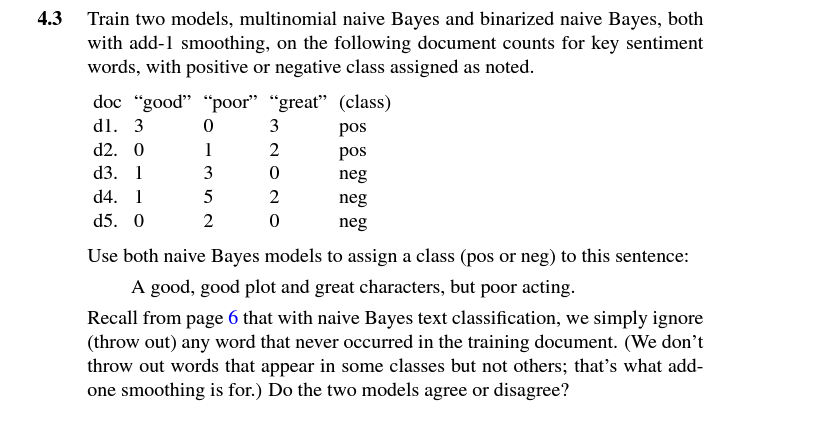

In [3]:
import numpy as np

vocab = 3; #[good poor great]
n = 5; #number of docs
W_pos = 6
W_neg = 14
#positives
P_good_pos = (3+1)/(W_pos+vocab)
P_poor_pos = (1+1)/(W_pos+vocab)
P_great_pos = (5+1)/(W_pos+vocab)
#negatives
P_good_neg = (2+1)/(W_neg+vocab)
P_poor_neg = (10+1)/(W_neg+vocab)
P_great_neg = (2+1)/(W_neg+vocab)

In [4]:
#Multinomial Bayes
C_good = 2;
C_poor = 1;
C_great = 1;

P_pos = 2/n
P_neg = 3/n
#log space
multinomial_pos = np.log(P_pos)+C_good*np.log(P_good_pos)+C_poor*np.log(P_poor_pos)+C_great*np.log(P_great_pos)
multinomial_neg = np.log(P_neg)+C_good*np.log(P_good_neg)+C_poor*np.log(P_poor_neg)+C_great*np.log(P_great_neg)
print("Multinomial Positive Class:", np.exp(multinomial_pos))
print("Multinomial Negative Class:", np.exp(multinomial_neg))

#Binary
C_good_binary = 1;

binary_pos = np.log(P_pos)+C_good_binary*np.log(P_good_pos)+C_poor*np.log(P_poor_pos)+C_great*np.log(P_great_pos)
binary_neg = np.log(P_neg)+C_good_binary*np.log(P_good_neg)+C_poor*np.log(P_poor_neg)+C_great*np.log(P_great_neg)
print("Binary Positive Class:", np.exp(binary_pos))
print("Binary Negative Class:", np.exp(binary_neg))

Multinomial Positive Class: 0.011705532693187005
Multinomial Negative Class: 0.0021335951437363057
Binary Positive Class: 0.02633744855967077
Binary Negative Class: 0.012090372481172397


**Most likely to be positive. Models agree**

# 2. What’s odds rule in binary classification, and how can you use it?

It compares the odds of an event happening to the odds of it not happening. 

*Odds = P/(1-P)*

It can allow you to to set thresholds on the odds to classify data points. If odds > 1, can classift as positive.

# 3.	Using the dataset from  https://www.kaggle.com/lakshmi25npathi/sentiment-analysis-of-imdb-movie-reviews/, you will create a Naïve Bayes classifier with binary bag of words to classify the movies.

- Compute the probability on the test set, using a 5-fold cross validation. What’s the accuracy obtained?
- Use the technique learned in class to add NOT_ to all words in the sentence following the word “not”, and a 5-fold cross validation, what’s the accuracy obtained?
- For both methods, compute the precision and recall

In [1]:
import nltk
stopword_list=nltk.corpus.stopwords.words('english')
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score, recall_score
import nltk

nltk.download('stopwords')
stopword_list = nltk.corpus.stopwords.words('english')

# loading dataset
data = pd.read_csv("/Users/Owner/Desktop/Homework/IMDB_Dataset/IMDB Dataset.csv")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#importing the training data
print(data.shape)
data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [4]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [5]:
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [6]:
#preprocessing
def preprocess_text(text):
    text = text.lower()
    #text = text.replace('<br />', ' ')
    return text

In [7]:
data['review'] = data['review'].apply(preprocess_text)

#Bag of Words grabbed from kaggle
vectorizer = CountVectorizer(min_df=0.0,max_df=1.0,binary=False,ngram_range=(1,3), stop_words = stopword_list)
X = vectorizer.fit_transform(data['review'])
y = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

#Naive Bayes
nb_classifier = MultinomialNB()

#5-fold
accuracy = cross_val_score(nb_classifier, X, y, cv=5, scoring='accuracy').mean()
print("Accuracy: ", str(accuracy))

Accuracy:  0.8890799999999999


In [8]:
#Modify text with NOT_
def add_not_tag(text):
    words = text.split()
    new_words = []
    add_not = False
    for word in words:
        if add_not:
            new_words.append(f'NOT_{word}')
        else:
            new_words.append(word)
        if word == 'not':
            add_not = True
        else:
            add_not = False
    return ' '.join(new_words)

data['review'] = data['review'].apply(add_not_tag)
X_not = vectorizer.fit_transform(data['review'])

# 5-fold cross-validation with NOT_
accuracy_not = cross_val_score(nb_classifier, X_not, y, cv=5, scoring='accuracy').mean()
print("Accuracy with NOT_: ", str(accuracy_not))

Accuracy with NOT_:  0.8913399999999999


In [9]:
# Train-test split 
# training size 40000
# testing size 10000
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=40000) 
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision: ", str(precision))
print("Recall: ", str(recall))

#train-test splits including NOT_
X_train_not, X_test_not, y_train_not, y_test_not = train_test_split(X_not, y, train_size=40000)
nb_classifier.fit(X_train_not, y_train_not)
y_pred_not = nb_classifier.predict(X_test_not)
precision_not = precision_score(y_test_not, y_pred_not)
recall_not = recall_score(y_test_not, y_pred_not)
print("Precision with NOT_: ", str(precision_not))
print("Recall with NOT_: ", str(recall_not))

Precision:  0.9025662424368871
Recall:  0.8711236407571487
Precision with NOT_:  0.9054276315789473
Recall with NOT_:  0.873116574147502


# 4.	Using the dataset from https://keras.io/api/datasets/reuters/, use Naïve Bayes to perform multiclass classification.

- What’s the macroaveraging of the accuracy?

In [9]:
from keras.datasets import reuters
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support

(train_data, train_labels), (test_data, test_labels) = reuters.load_data()
w2i = reuters.get_word_index()
i2w = dict([(value,key) for (key, value) in w2i.items()])

train_data_text = [' '.join([i2w.get(i-3, '?') for i in s]) for s in train_data]
#added for test data set
test_data_text = [' '.join([i2w.get(i - 3, '?') for i in s]) for s in test_data]

In [10]:
train_data_text[0]

'? mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [11]:
vectorizer = CountVectorizer(max_features=10000)
X_train = vectorizer.fit_transform(train_data_text)
X_test = vectorizer.transform(test_data_text)

#train Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, train_labels)

#predict the classes for the test data
y_pred = classifier.predict(X_test)

# precision, recall, and f1 macro averaging
precision, recall, f1, _ = precision_recall_fscore_support(test_labels, y_pred, average='macro')

# calculate the macroaveraging
macro_accuracy = (precision + recall + f1) / 3

print("Macroaveraging accuracy: ", str(macro_accuracy))

Macroaveraging accuracy:  0.47302453662035276


C:\Users\Owner\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
